In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import class_weight


In [2]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [3]:
data.head()

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,HOROZ
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,SEKER
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,DERMASON
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,DERMASON
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,SIRA


# Check for nulls

In [4]:
data.isna().sum()

ID                 0
Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
y                  0
dtype: int64

# check_duplicates

In [5]:
data.duplicated().sum()

0

# info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10834 entries, 0 to 10833
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10834 non-null  int64  
 1   Area             10834 non-null  int64  
 2   Perimeter        10834 non-null  float64
 3   MajorAxisLength  10834 non-null  float64
 4   MinorAxisLength  10834 non-null  float64
 5   AspectRation     10834 non-null  float64
 6   Eccentricity     10834 non-null  float64
 7   ConvexArea       10834 non-null  int64  
 8   EquivDiameter    10834 non-null  float64
 9   Extent           10834 non-null  float64
 10  Solidity         10834 non-null  float64
 11  roundness        10834 non-null  float64
 12  Compactness      10834 non-null  float64
 13  ShapeFactor1     10834 non-null  float64
 14  ShapeFactor2     10834 non-null  float64
 15  ShapeFactor3     10834 non-null  float64
 16  ShapeFactor4     10834 non-null  float64
 17  y           

# Target_variable

In [7]:
data['y'].value_counts()

DERMASON    2837
SIRA        2109
SEKER       1621
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

Imabalanced

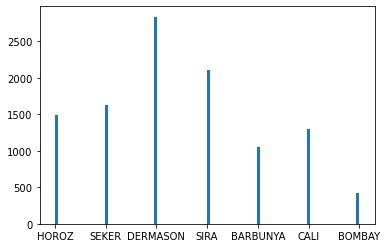

In [8]:
plt.hist(data['y'],bins=int(np.sqrt(len(data['y']))))
plt.show()

# Balance

In [9]:
# from imblearn.over_sampling import RandomOverSampler

# oversample = RandomOverSampler(sampling_strategy='all')
# X=data.drop('y',axis=1)
# X_train_copy,y_train_copy = oversample.fit_resample(X,data[['y']])

In [10]:
# data=pd.concat([X_train_copy,y_train_copy],axis=1)

https://towardsdatascience.com/how-to-handle-multiclass-imbalanced-data-say-no-to-smote-e9a7f393c310

# Visualize_features

In [11]:
def visualize_data(data):
    data_visualize=data.copy()
    target_visualize=data_visualize['y']
    data_visualize.drop(['ID','y'],axis=1,inplace=True)
    for col in data_visualize.columns:
            sns.boxplot(target_visualize,data_visualize[col])
            plt.show()

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


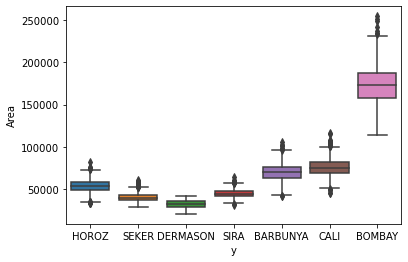

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


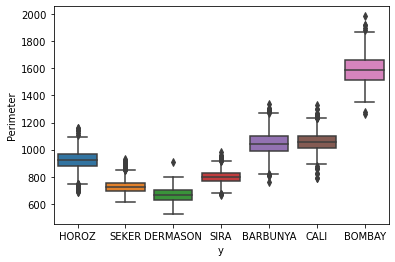

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


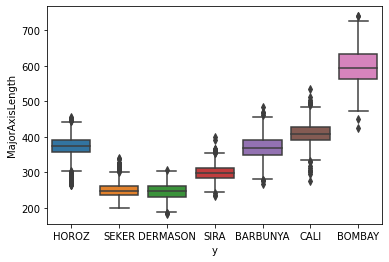

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


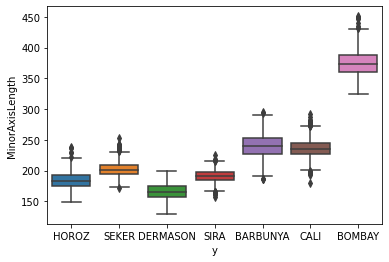

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


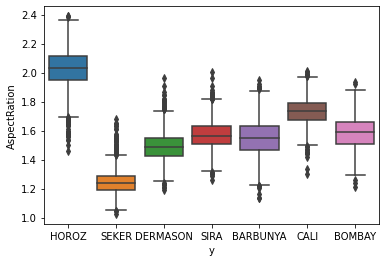

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


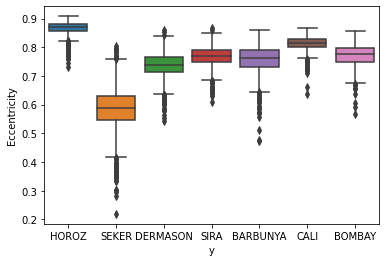

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


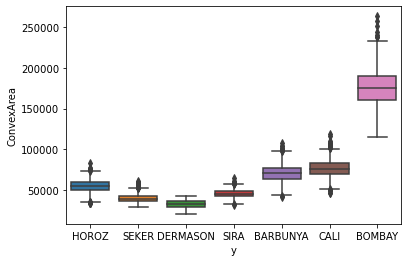

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


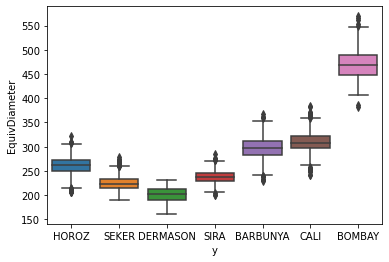

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


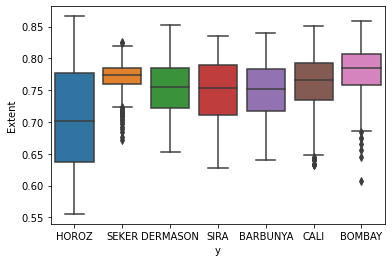

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


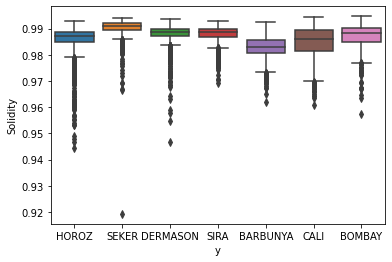

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


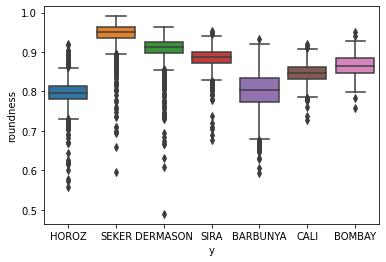

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


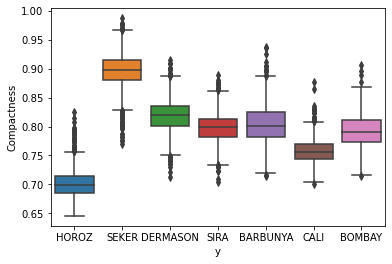

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


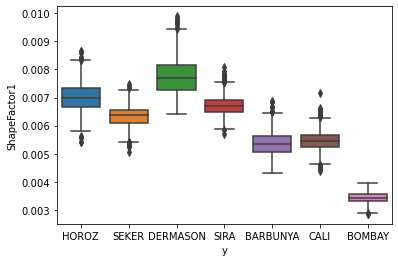

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


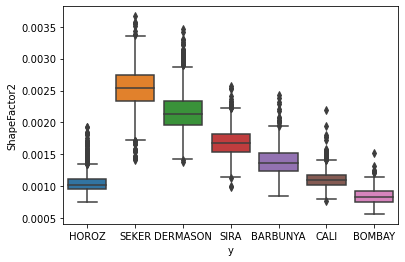

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


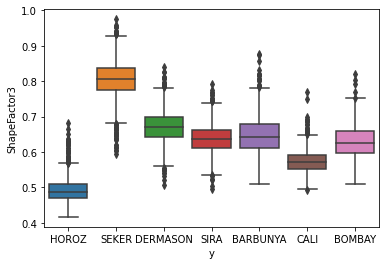

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


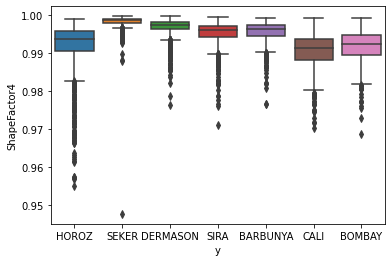

In [12]:
visualize_data(data)

notes: 

1-some features have an overlapping between boxes which indicates that they are not doing well in differentating between 

classes.

2-there is huge amount of oultiers

# Feature importnace

1-for decision trees

In [13]:
def Decision_tree_importance(data):
    from sklearn.tree import DecisionTreeClassifier
    y=data['y']
    X=data.drop('y',axis=1)
    clf=DecisionTreeClassifier()
    clf.fit(X,y)
    importances=clf.feature_importances_
    forest_importances = pd.Series(importances, index=X.columns)
    fig, ax = plt.subplots()
    forest_importances.plot.bar(yerr=forest_importances, ax=ax)
    ax.set_title("Feature importances using MDI")
    ax.set_ylabel("Mean decrease in impurity")
    fig.tight_layout()

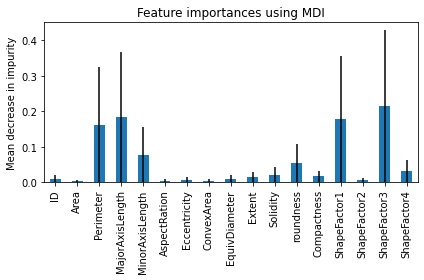

In [14]:
Decision_tree_importance(data)

# Skewness and oultiers

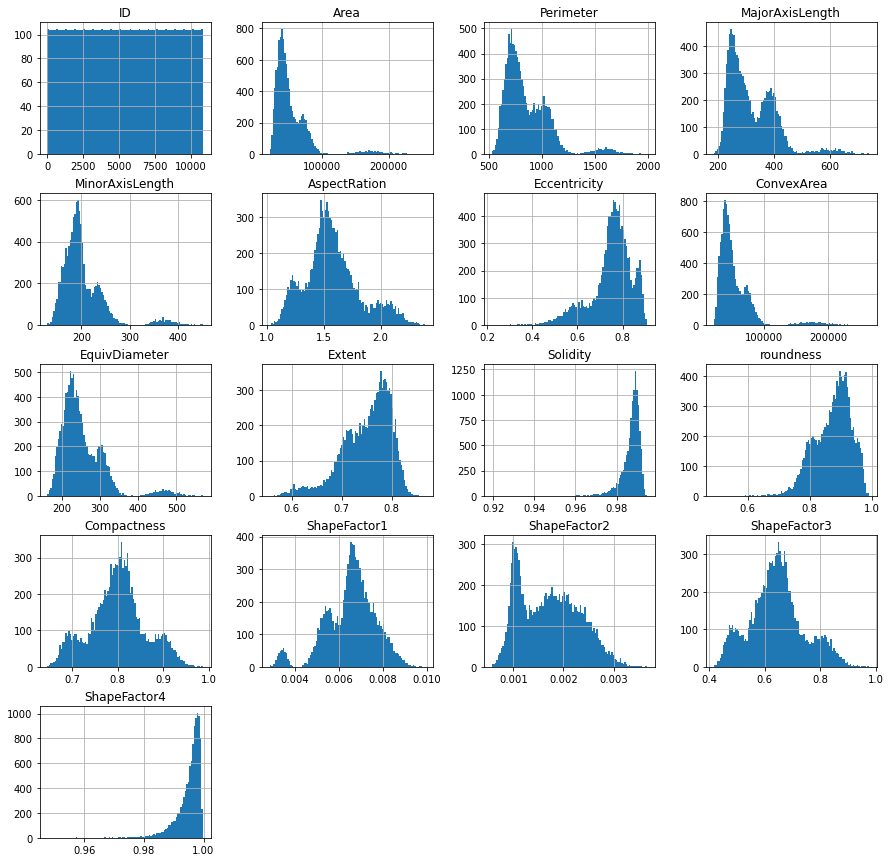

In [15]:
data.hist(bins=int(np.sqrt(len(data))),figsize=(15,15));

In [16]:
data.skew()

/var/folders/pt/jyznl8l11dnchkwt6_m3kqy80000gn/T/ipykernel_5664/1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


ID                 0.000000
Area               2.970246
Perimeter          1.650773
MajorAxisLength    1.390286
MinorAxisLength    2.251468
AspectRation       0.589186
Eccentricity      -1.075626
ConvexArea         2.960315
EquivDiameter      1.971378
Extent            -0.900892
Solidity          -2.507634
roundness         -0.659566
Compactness        0.038242
ShapeFactor1      -0.544873
ShapeFactor2       0.292677
ShapeFactor3       0.245589
ShapeFactor4      -2.628540
dtype: float64

In [17]:
def display_skew_kurt(df):
    skew= df.select_dtypes(np.number).skew()
    abs_skew = abs(skew)
    kurt = df.select_dtypes(np.number).kurt()
    skew_kurt_table = pd.concat([skew,abs_skew,kurt], axis = 1,
                                keys =['Skew','Absolute Skew','Kurtosis']).sort_values("Skew",ascending = False)
    skew_kurt_table['Skewed'] = skew_kurt_table['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
    return skew_kurt_table

In [18]:
skewness_check=display_skew_kurt(data)
skewness_check   

,Skew,Absolute Skew,Kurtosis,Skewed
Area,2.970246,2.970246,10.846326,True
ConvexArea,2.960315,2.960315,10.800252,True
MinorAxisLength,2.251468,2.251468,6.689757,True
EquivDiameter,1.971378,1.971378,5.267857,True
Perimeter,1.650773,1.650773,3.673793,True
MajorAxisLength,1.390286,1.390286,2.640599,True
AspectRation,0.589186,0.589186,0.169588,True
ShapeFactor2,0.292677,0.292677,-0.847298,False
ShapeFactor3,0.245589,0.245589,-0.112545,False
Compactness,0.038242,0.038242,-0.190212,False


In [19]:
skewed_columns=skewness_check.index[skewness_check['Skewed'] == True].tolist()
len(skewed_columns)

13

from 

-0.5 to 0.5..................no skewness

0.5 to 1 OR -0.5 to -1.........moderate skewness

if > 1  or <-1 .....................high skewness

# Correlation 

In [20]:
def encode_target(data):
    data['y'].replace({'DERMASON':0,'SIRA':1,'SEKER':2,'HOROZ':3,'CALI':4,'BARBUNYA':5,'BOMBAY':6},inplace=True)
    return data

In [21]:
def decode_target(data):
    data['y'].replace({0:'DERMASON',1:'SIRA',2:'SEKER',3:'HOROZ',4:'CALI',5:'BARBUNYA',6:'BOMBAY'},inplace=True)
    return data

In [22]:
data_encoded=encode_target(data)
data_encoded

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
0,0,58238,971.303,397.202654,186.945510,2.124697,0.882317,58977,272.306674,0.604756,0.987470,0.775723,0.685561,0.006820,0.000929,0.469994,0.998595,3
1,1,44515,757.601,265.590470,213.967453,1.241266,0.592420,44780,238.071960,0.771745,0.994082,0.974620,0.896387,0.005966,0.002376,0.803510,0.997370,2
2,2,31662,653.783,239.902428,168.421505,1.424417,0.712136,32034,200.781748,0.801407,0.988387,0.930853,0.836931,0.007577,0.002293,0.700453,0.997737,0
3,3,38778,734.020,268.446281,184.061923,1.458456,0.727925,39208,222.201897,0.766137,0.989033,0.904439,0.827733,0.006923,0.002005,0.685142,0.999250,0
4,4,42530,775.403,281.212824,193.236878,1.455275,0.726511,43028,232.703412,0.729816,0.988426,0.888895,0.827499,0.006612,0.001912,0.684755,0.996507,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10829,10829,37777,716.007,250.174662,192.704033,1.298233,0.637708,38174,219.315230,0.770519,0.989600,0.925983,0.876648,0.006622,0.002413,0.768513,0.997708,2
10830,10830,32187,667.621,247.778775,165.786862,1.494562,0.743179,32582,202.439525,0.731805,0.987877,0.907466,0.817017,0.007698,0.002116,0.667517,0.997646,0
10831,10831,81837,1095.937,433.838186,241.527026,1.796230,0.830699,82554,322.797312,0.771996,0.991315,0.856226,0.744050,0.005301,0.001002,0.553610,0.994412,4
10832,10832,48212,826.362,309.639462,199.285811,1.553746,0.765357,48777,247.760822,0.677002,0.988417,0.887206,0.800159,0.006422,0.001624,0.640255,0.994793,1


In [23]:
data_encoded.corr()['y'].sort_values(ascending=False)

y                  1.000000
Perimeter          0.856849
EquivDiameter      0.834189
MajorAxisLength    0.814923
MinorAxisLength    0.784747
ConvexArea         0.772137
Area               0.770679
AspectRation       0.307983
Eccentricity       0.238923
ID                 0.012671
Extent            -0.012577
ShapeFactor3      -0.288999
Compactness       -0.297618
Solidity          -0.328793
ShapeFactor4      -0.365705
roundness         -0.555520
ShapeFactor2      -0.637964
ShapeFactor1      -0.819143
Name: y, dtype: float64

In [24]:
correlation=data_encoded.corr()
correlation.style.background_gradient(cmap='coolwarm')

,ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,y
ID,1.000000,-0.006442,0.000679,-0.000639,-0.003572,0.004579,0.001265,-0.006194,-0.002186,-0.008626,-0.015873,-0.015406,-0.003421,-0.004321,-0.004543,-0.002997,-0.001742,0.012671
Area,-0.006442,1.000000,0.966881,0.933198,0.952536,0.243893,0.268565,0.999940,0.984987,0.061387,-0.200078,-0.354127,-0.270134,-0.848371,-0.640619,-0.274081,-0.365265,0.770679
Perimeter,0.000679,0.966881,1.000000,0.977830,0.915162,0.386119,0.390878,0.967823,0.991439,-0.013889,-0.307817,-0.543906,-0.407622,-0.866250,-0.768104,-0.409079,-0.439272,0.856849
MajorAxisLength,-0.000639,0.933198,0.977830,1.000000,0.830452,0.548912,0.539787,0.933934,0.962754,-0.070935,-0.285916,-0.589910,-0.566905,-0.777222,-0.858387,-0.566625,-0.491591,0.814923
MinorAxisLength,-0.003572,0.952536,0.915162,0.830452,1.000000,-0.003095,0.024388,0.952268,0.949832,0.152157,-0.160567,-0.211275,-0.021042,-0.947040,-0.476659,-0.025152,-0.273554,0.784747
AspectRation,0.004579,0.243893,0.386119,0.548912,-0.003095,1.000000,0.924040,0.245408,0.305557,-0.372383,-0.266038,-0.762150,-0.987664,0.019197,-0.837526,-0.978550,-0.456479,0.307983
Eccentricity,0.001265,0.268565,0.390878,0.539787,0.024388,0.924040,1.000000,0.270283,0.319497,-0.319550,-0.295614,-0.716765,-0.970173,0.015644,-0.859207,-0.980946,-0.453895,0.238923
ConvexArea,-0.006194,0.999940,0.967823,0.933934,0.952268,0.245408,0.270283,1.000000,0.985223,0.059711,-0.209552,-0.358655,-0.271930,-0.848345,-0.642119,-0.275901,-0.371420,0.772137
EquivDiameter,-0.002186,0.984987,0.991439,0.962754,0.949832,0.305557,0.319497,0.985223,1.000000,0.035291,-0.234767,-0.432327,-0.329457,-0.893598,-0.714397,-0.332067,-0.402038,0.834189
Extent,-0.008626,0.061387,-0.013889,-0.070935,0.152157,-0.372383,-0.319550,0.059711,0.035291,1.000000,0.180843,0.341669,0.355279,-0.147888,0.235020,0.348442,0.142275,-0.012577


# Preprocessing

In [25]:
def remove_outliers(data):
    z_scores = stats. zscore(data[skewed_columns]) 
    abs_z_scores = np. abs(z_scores)
    filtered_entries = (abs_z_scores < 3). all(axis=1)
    new_df = data[filtered_entries]
    return new_df
    

In [26]:
data_new_features=data.copy()

In [27]:
data_new_features['Equivalent Spherical Volume']=(4/3)*np.pi*np.sqrt(data_new_features['Area']/np.pi)**3


In [28]:
data_new_features.corr()['y'].sort_values(ascending=False)

y                              1.000000
Perimeter                      0.856849
EquivDiameter                  0.834189
MajorAxisLength                0.814923
MinorAxisLength                0.784747
ConvexArea                     0.772137
Area                           0.770679
Equivalent Spherical Volume    0.690892
AspectRation                   0.307983
Eccentricity                   0.238923
ID                             0.012671
Extent                        -0.012577
ShapeFactor3                  -0.288999
Compactness                   -0.297618
Solidity                      -0.328793
ShapeFactor4                  -0.365705
roundness                     -0.555520
ShapeFactor2                  -0.637964
ShapeFactor1                  -0.819143
Name: y, dtype: float64

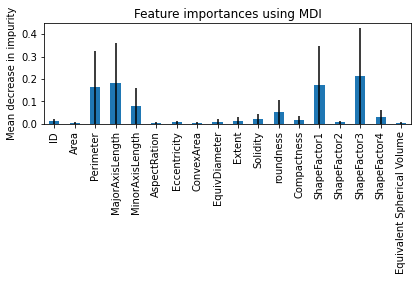

In [29]:
Decision_tree_importance(data_new_features)

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

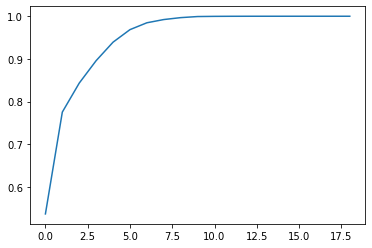

In [31]:
from sklearn.decomposition import PCA
data_new_features=scale.fit_transform(data_new_features)
pca=PCA()
pca.fit(data_new_features)
exp_var=pca.explained_variance_ratio_
exp_cumsum=np.cumsum(exp_var)
plt.plot(exp_cumsum)

In [32]:
pca=PCA(n_components=6)

In [33]:
def data_prep (data,test=False):
    if test==True:
        id_col=data['ID']
        data_scaled=scale.transform(data)
        data_scaled=pca.transform(data_scaled)
        data_scaled=pd.DataFrame(data_scaled)
        return data_scaled, id_col
    else :
        new_df=remove_outliers(data)
        labels=new_df['y']
        new_df=new_df.drop('y',axis=1)
        data_scaled=scale.fit_transform(new_df)
        data_scaled=pca.fit_transform(data_scaled)
        data_scaled=pd.DataFrame(data_scaled)
        return data_scaled,labels
    
    

In [34]:
final_data=data.copy()

In [35]:
y=final_data['y']
X=final_data.drop('y',axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,stratify=data['y'])

In [37]:
X_train['y']=y_train


In [38]:
X_train=encode_target(X_train)


In [39]:
data_to_model,labels=data_prep(X_train)


In [40]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(max_depth=6,n_estimators=200,
                       learning_rate=0.05,random_state=42)


In [41]:
model.fit(data_to_model,labels)


LGBMClassifier(learning_rate=0.05, max_depth=6, n_estimators=200,
               random_state=42)

In [42]:
X_val,_=data_prep(X_val,test=True)


In [43]:
predictions=model.predict(X_val)


In [44]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix

In [45]:
f1_score(y_val,predictions,average='micro')


0.912782648823258

In [46]:
data_test_to_model,ID=data_prep(data_test,test=True)

/Users/omarmarie/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


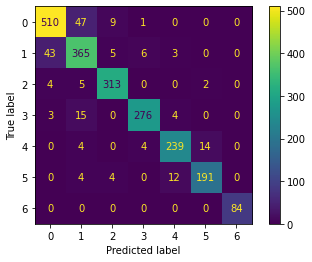

In [47]:
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,plot_confusion_matrix
plot_confusion_matrix(model,X_val,y_val);

In [48]:
predictions=model.predict(data_test_to_model)
predictions

array([3, 0, 5, ..., 3, 0, 1])

In [49]:
data_test_to_model['y']=predictions
data_test_to_model

,0,1,2,3,4,5,y
0,7.156392,-3.313845,10.280887,-1.518740,2.293267,4.431227,3
1,-3.416419,-1.136787,0.293735,-1.746563,0.425362,-0.408536,0
2,0.716612,2.209204,2.429434,-1.693204,0.132507,-1.320355,5
3,-4.184385,-1.958459,0.464651,-1.779952,-0.530553,-0.109291,0
4,8.911954,7.749260,-1.300149,-1.665028,0.202942,0.816565,6
...,...,...,...,...,...,...,...
2704,4.298869,-0.321515,-0.186749,-2.562767,0.633965,0.217972,4
2705,-3.666540,2.848061,-0.248227,-2.627324,-0.358599,0.618002,2
2706,8.354228,-3.595534,10.845687,-2.362128,2.603451,5.354068,3
2707,-1.898482,-1.117783,0.773054,-2.617754,-0.318100,-0.470480,0


In [50]:
s=decode_target(data_test_to_model)
s

,0,1,2,3,4,5,y
0,7.156392,-3.313845,10.280887,-1.518740,2.293267,4.431227,HOROZ
1,-3.416419,-1.136787,0.293735,-1.746563,0.425362,-0.408536,DERMASON
2,0.716612,2.209204,2.429434,-1.693204,0.132507,-1.320355,BARBUNYA
3,-4.184385,-1.958459,0.464651,-1.779952,-0.530553,-0.109291,DERMASON
4,8.911954,7.749260,-1.300149,-1.665028,0.202942,0.816565,BOMBAY
...,...,...,...,...,...,...,...
2704,4.298869,-0.321515,-0.186749,-2.562767,0.633965,0.217972,CALI
2705,-3.666540,2.848061,-0.248227,-2.627324,-0.358599,0.618002,SEKER
2706,8.354228,-3.595534,10.845687,-2.362128,2.603451,5.354068,HOROZ
2707,-1.898482,-1.117783,0.773054,-2.617754,-0.318100,-0.470480,DERMASON


In [51]:
f=pd.concat([ID,s['y']],axis=1)

In [52]:
f

,ID,y
0,10834,HOROZ
1,10835,DERMASON
2,10836,BARBUNYA
3,10837,DERMASON
4,10838,BOMBAY
...,...,...
2704,13538,CALI
2705,13539,SEKER
2706,13540,HOROZ
2707,13541,DERMASON
